In [11]:
from cProfile import label

import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

## Mean-squared error

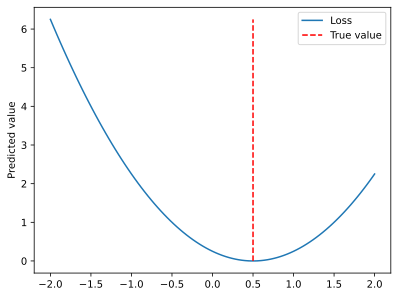

In [12]:
# loss function
lossFnMSE = nn.MSELoss()

# create predictions and real answer
yHat = torch.linspace(-2,2,101)
y = torch.tensor(.5)

# compute MSE loss function
L = np.zeros(101)
for i,yy in enumerate(yHat):
    L[i] = lossFnMSE(yy,y)

plt.plot(yHat,L,label="Loss")
plt.plot([y,y],[0,np.max(L)],"r--",label="True value")
plt.ylabel('Predicted value')
plt.legend()
plt.show()

## Binary Cross Entropy

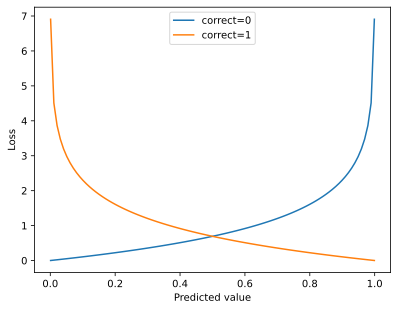

In [13]:
# loss functions
lossFnBCE = nn.BCELoss()

# create predictions and real answer
yHat = torch.linspace(.001,.999,101)
y1 = torch.tensor(0.)
y2 = torch.tensor(1.)

# compute MSE loss function
L = np.zeros((101,2))
for i,yy in enumerate(yHat):
    L[i,0] = lossFnBCE(yy,y1) # 0 is the correct answer
    L[i,1] = lossFnBCE(yy,y2) # 1 is the correct answer

plt.plot(yHat,L)
plt.xlabel("Predicted value")
plt.ylabel("Loss")
plt.legend(['correct=0','correct=1'])
plt.show()

In [14]:
# the example above show data already in probabilities.

# 'raw' output of a model
yHat = torch.tensor(2.)
# print(lossFnBCE(yHat,y))

# convert to prob via sigmoid
sig = nn.Sigmoid()
print(lossFnBCE(sig(yHat),y2))

tensor(0.1269)


In [15]:
# Pytorch recommends using a single function that incorporates sigmoid+BCE due to increased numerical stability.

# the recommended way to do it:
lossFnBCE = nn.BCEWithLogitsLoss()
yHat = torch.tensor(2.)
print(lossFnBCE(yHat,y2))

# In toy example, numerical acc usually isn't a problem.

tensor(0.1269)


## Categorical cross-entropy

In [16]:
lossFnCCE = nn.CrossEntropyLoss()

# vector of output layer (pre-softmax)
yHat = torch.tensor([[1.,4,3]])

for i in range(3):
    correctAnswer = torch.tensor([i])
    thisLoss = lossFnCCE(yHat,correctAnswer).item()
    print('Loss when correct answer is %g: %g'%(i,thisLoss))

Loss when correct answer is 0: 3.34901
Loss when correct answer is 1: 0.349012
Loss when correct answer is 2: 1.34901


In [17]:
# Repeat using pre-softmaxified output 
### this is incorrect
sm = nn.Softmax(dim=1)
yHat_sm = sm(yHat)

for i in range(3):
    correctAnswer = torch.tensor([i])
    thisLoss = lossFnCCE(yHat_sm,correctAnswer).item()
    print('Loss when correct answer is %g: %g'%(i,thisLoss))

Loss when correct answer is 0: 1.43658
Loss when correct answer is 1: 0.766318
Loss when correct answer is 2: 1.21221


In [18]:
# compare raw, softmax , and log-softmax outputs
sm = nn.LogSoftmax(dim=1)
yHat_logSm = sm(yHat)

print(yHat)
print(yHat_sm)
# the difference in logsm is more so the model can learn more.
print(yHat_logSm)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


### Creating your own custom loss function

In [19]:
class myLoss(nn.Module): # inherit info from nn.Module
    def __init__(self):
        super().__init__()
        
    def forward(self, x,y):
        loss = torch.abs(x - y)
        return loss
    
# test it out!
Lfun = myLoss()
Lfun(torch.tensor(4),torch.tensor(5.2))

tensor(1.2000)